In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Data

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch the Web Page
url = "https://www.the-numbers.com/movie/budgets/all"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Step 2: Parse HTML
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table")

# Step 3: Extract Column Names
headers = [th.text.strip() for th in table.find_all("th")]

# Step 4: Extract Table Rows
data = []
for row in table.find_all("tr")[1:]:  # Skip header row
    cols = [td.text.strip() for td in row.find_all("td")]
    if len(cols) == len(headers):  # Ensure row length matches headers
        data.append(cols)

# Step 5: Convert to DataFrame
df = pd.DataFrame(data, columns=headers)
df.to_csv("data/movie_budgets.csv", index=False)

# Display first few rows
df.head()


,,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,717,503,922"
2,3,"Dec 9, 2022",Avatar: The Way of Water,"$400,000,000","$684,075,767","$2,320,250,281"
3,4,"May 17, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,"$5,764,680"
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"


In [3]:
# Data Cleaning and Preprocessing
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace("$", "").replace(",", ""))
    return float(value)

# Store column names in variables
budget_column = 'ProductionBudget'
gross_column = 'WorldwideGross'

df[budget_column] = df[budget_column].apply(clean_currency)
df[gross_column] = df[gross_column].apply(clean_currency)


In [4]:
#Remove rows with 0 values.
df = df[(df[budget_column] > 0) & (df[gross_column] > 0)]

# Calculate Profit
df.loc[:, 'Profit'] = df[gross_column] - df[budget_column]

In [5]:
# Model Building and Evaluation
X = df[[budget_column]]
y = df[gross_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


R^2 Score: 0.32565794090995737
Mean Absolute Error (MAE): 287186998.36173856
Mean Squared Error (MSE): 1.2093950602903688e+17


Predicted Profit for $500,000 budget: $129177292.63600665


c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


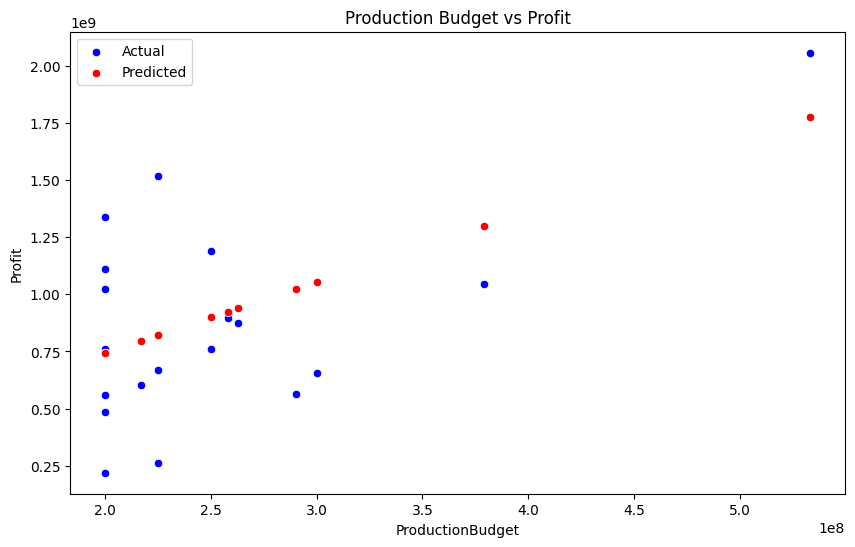

In [8]:

# Step 11: Predict Profit for a $500,000 Budget
budget = np.array([[500000]])
predicted_profit = model.predict(budget)[0]
print(f"Predicted Profit for $500,000 budget: ${predicted_profit}")

# Step 12: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[budget_column], y=y_test, label="Actual", color="blue")
sns.scatterplot(x=X_test[budget_column], y=y_pred, label="Predicted", color="red")
plt.xlabel(budget_column)
plt.ylabel("Profit")
plt.title("Production Budget vs Profit")
plt.legend()
plt.show()

c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Profit for $500,000 budget: $128677292.63600665


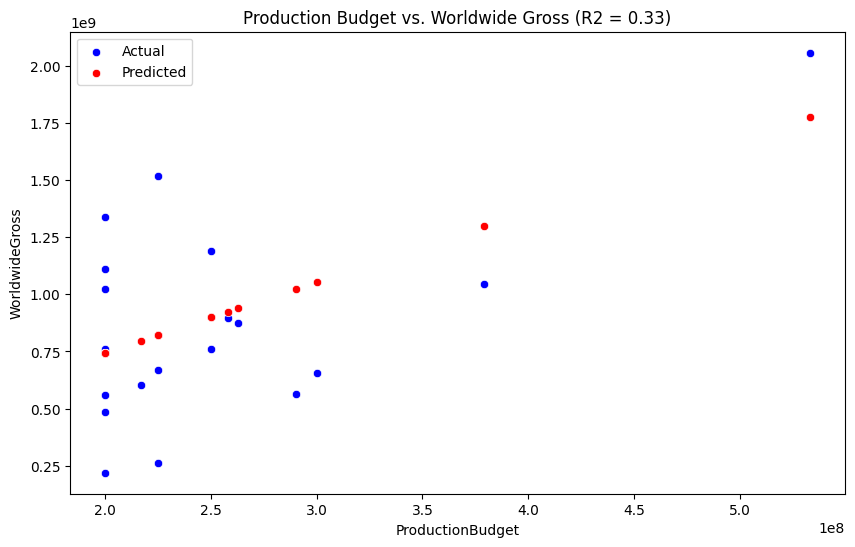

In [9]:
# Step 11: Predict Profit for a $500,000 Budget
predicted_gross = model.predict(budget)[0]
predicted_profit = predicted_gross - budget[0][0]
print(f"Predicted Profit for $500,000 budget: ${predicted_profit}")

# Step 12: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[budget_column], y=y_test, label="Actual", color="blue")
sns.scatterplot(x=X_test[budget_column], y=y_pred, label="Predicted", color="red")
plt.xlabel(budget_column)
plt.ylabel(gross_column)
plt.title(f"Production Budget vs. Worldwide Gross (R2 = {r2:.2f})")
plt.legend()
plt.show()

In [11]:
model.coef_, model.intercept_
# Step 13: Save the Model
import joblib
joblib.dump(model, "models/budget_profit_model.pkl")
# Load the model
loaded_model = joblib.load("budget_profit_model.pkl")
# Predict using the loaded model
predicted_profit_loaded = loaded_model.predict(budget)[0]
print(f"Predicted Profit for $500,000 budget using loaded model: ${predicted_profit_loaded}")

Predicted Profit for $500,000 budget using loaded model: $129177292.63600665


c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
